In [127]:
#api call
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '52e16926-e467-43b4-9786-20069f5bc8a8',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2025-07-21T14:05:50.081Z', 'error_code': 0, 'error_message': None, 'elapsed': 95, 'credit_count': 1, 'notice': None, 'total_count': 9396}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 12261, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [102]:
type(data)

dict

In [103]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [128]:
#normalise the data and adding a timestamp
df = pd.json_normalize(data['data'])
df['timestamp'] =  pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12261,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19895400.00000,19895400.00000,False,NaN,1,NaN,NaN,None,2025-07-21T14:05:00.000Z,118805.07765,67639182963.04090,34.98740,0.63349,0.22873,-2.50206,14.64079,7.16769,31.84866,2363674541807.92041,59.71190,2494906630576.22998,None,2025-07-21T14:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-21 19:36:15.667383
1,1027,Ethereum,ETH,ethereum,10403,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120711744.43014,120711744.43014,True,NaN,2,NaN,NaN,None,2025-07-21T14:05:00.000Z,3821.84473,43373294997.58134,24.86800,0.58601,2.00583,24.67366,57.68394,43.80849,133.12766,461341544732.79163,11.65320,461341544732.78998,None,2025-07-21T14:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-21 19:36:15.667383
2,52,XRP,XRP,xrp,1656,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00000,59182189917.00000,99985925712.00000,False,NaN,3,NaN,NaN,None,2025-07-21T14:04:00.000Z,3.58921,9300848017.70010,33.68090,1.59166,2.00580,19.05951,69.54214,48.36485,68.34416,212417388321.03070,5.36850,358921135934.53998,None,2025-07-21T14:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-21 19:36:15.667383
3,825,Tether USDt,USDT,tether,137768,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,161660770072.70099,164817298715.85165,True,NaN,4,NaN,NaN,None,2025-07-21T14:04:00.000Z,1.00030,140412960683.85281,46.77490,0.01118,0.00277,-0.00887,0.01387,0.02838,0.01370,161709520083.33139,4.08640,164867000601.23001,None,2025-07-21T14:04:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-07-21 19:36:15.667383
4,1839,BNB,BNB,bnb,2628,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,139288908.32000,139288908.32000,False,NaN,5,NaN,NaN,None,2025-07-21T14:04:00.000Z,775.75415,2787502635.87466,37.01850,0.55105,3.50902,10.21264,21.78848,13.08001,27.63279,108053948162.43448,2.73050,108053948162.42999,None,2025-07-21T14:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-21 19:36:15.667383
5,5426,Solana,SOL,solana,954,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,538046972.25532,605752424.11667,True,NaN,6,525236893.30000,101071018813.05247,None,2025-07-21T14:04:00.000Z,192.42940,8838954118.72017,67.00220,0.65482,5.17693,14.39799,36.68505,8.32062,34.31294,103536054585.68361,2.61670,116564573880.72000,None,2025-07-21T14:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-21 19:36:15.667383
6,3408,USDC,USDC,usd-coin,29656,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,64340508545.84744,64340508545.84744,False,NaN,7,60901219650.23000,60895612864.16032,None,2025-07-21T14:04:00.000Z,0.99991,17347940965.08345,33.90850,0.00818,0.00699,-0.02198,-0.00281,0.00834,0.00037,64334585126.42986,1.62590,64334585126.43000,None,2025-07-21T14:04:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-07-21 19:36:15.667383
7,74,Dogecoin,DOGE,dogecoin,1258,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,150187816383.70526,150187816383.70526,True,NaN,8,NaN,NaN,None,2025-07-21T14:05:00.000Z,0.27435,6639262529.48490,88.47860,0.80916,7.67304,32.94006,70.87521,14.12487,62.69154,41204169654.35436,1.040

In [137]:
#api call function
#for keeping it in a dataframe
def api_runner():

    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '52e16926-e467-43b4-9786-20069f5bc8a8',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      # print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df = pd.concat([df, df2], ignore_index=True)

In [138]:
#timeout function, runs the api call at an interval of every minute
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner Completed')
    sleep(60) #sleep for 1 minute
exit()

API Runner Completed
API Runner Completed


KeyboardInterrupt: 

In [134]:
#api call function
#for generating a csv and updating it
def api_runner():

    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '52e16926-e467-43b4-9786-20069f5bc8a8',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      # print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df
    
    if  not os.path.isfile(r'C:\Users\charv\API.csv'):
        df.to_csv(r'C:\Users\charv\API.csv', header = 'column_names')
    else:
        df.to_csv(r'C:\Users\charv\API.csv', mode='a', header = False)

In [135]:
#reading csv
df72 = pd.read_csv(r'C:\Users\charv\API.csv')
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,0,1,Bitcoin,BTC,bitcoin,12261,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19895359.00000,19895359.00000,False,NaN,1,NaN,NaN,NaN,2025-07-21T13:22:00.000Z,118279.17157,66467986029.92319,34.04700,-0.15665,0.09615,-2.74239,13.86868,6.27581,32.03013,2353206580624.95361,59.88720,2483862602988.16992,NaN,2025-07-21T13:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-21 18:52:31.730061
1,1,1027,Ethereum,ETH,ethereum,10403,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120711744.43014,120711744.43014,True,NaN,2,NaN,NaN,NaN,2025-07-21T13:22:00.000Z,3788.33011,44088546392.97769,26.54660,-0.63202,0.92724,24.48465,55.25391,42.90898,132.03703,457295936511.58002,11.64700,457295936511.58002,NaN,2025-07-21T13:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-21 18:52:31.730061
2,2,52,XRP,XRP,xrp,1656,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,59182189917.00000,99985925712.00000,False,NaN,3,NaN,NaN,NaN,2025-07-21T13:22:00.000Z,3.53578,9114300330.95958,29.89270,0.28804,0.74713,19.90166,65.97046,46.03703,67.62901,209255198267.02872,5.32230,353577991217.46002,NaN,2025-07-21T13:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-21 18:52:31.730061
3,3,825,Tether USDt,USDT,tether,137765,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'usd...",NaN,161660770072.70099,164817298715.85165,True,NaN,4,NaN,NaN,NaN,2025-07-21T13:20:00.000Z,1.00021,138264398017.01434,46.12430,0.00226,-0.00823,0.02287,0.00007,0.04914,0.04364,161694087290.68942,4.11860,164851266473.57001,NaN,2025-07-21T13:20:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-07-21 18:52:31.730061
4,4,1839,BNB,BNB,bnb,2628,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,139288910.44000,139288910.44000,False,NaN,5,NaN,NaN,NaN,2025-07-21T13:20:00.000Z,770.06591,2721648529.76513,33.62820,0.23454,2.99091,9.56505,20.33398,12.12061,26.79584,107261641968.68460,2.73210,107261641968.67999,NaN,2025-07-21T13:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-21 18:52:31.730061
5,5,5426,Solana,SOL,solana,954,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,538047097.81492,605752442.98909,True,NaN,6,525236893.30000,100321989175.95276,NaN,2025-07-21T13:20:00.000Z,191.00332,8893266564.89989,71.84700,0.10047,4.68686,14.30777,34.44021,7.65875,33.86788,102768780738.16306,2.61730,115700726289.52000,NaN,2025-07-21T13:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-21 18:52:31.730061
6,6,3408,USDC,USDC,usd-coin,29653,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,64333719930.16241,64333719930.16241,False,NaN,7,60901219650.23000,60891857124.45564,NaN,2025-07-21T13:20:00.000Z,0.99985,16915008445.73956,32.57660,0.00166,0.00147,0.00075,-0.02693,0.02103,0.00466,64323829715.90289,1.63820,64323829715.90000,NaN,2025-07-21T13:20:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-07-21 18:52:31.730061
7,7,74,Dogecoin,DOGE,dogecoin,1258,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,150187556383.70514,150187556383.70514,True,NaN,8,NaN,NaN,NaN,2025-07-21T13:22:00.000Z,0.27089,6490994216.03946,82.30100,-0.31135,6.48152,32.47638,66.85643,12.48171,63.27315,4068487897

In [139]:
#reading dataframe
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12261,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19895400.00000,19895400.00000,False,NaN,1,NaN,NaN,None,2025-07-21T14:12:00.000Z,118574.27039,67724461576.43504,34.80780,0.46164,0.15242,-2.52906,14.47411,7.12694,31.25225,2359082539104.66016,59.59330,2490059678176.75977,None,2025-07-21T14:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-21 19:42:59.941924
1,1027,Ethereum,ETH,ethereum,10403,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120711744.43014,120711744.43014,True,NaN,2,NaN,NaN,None,2025-07-21T14:12:00.000Z,3806.08337,44257256025.74044,27.42320,0.55822,1.84915,24.43859,57.16967,43.59740,131.08749,459438962908.81665,11.60760,459438962908.82001,None,2025-07-21T14:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-21 19:42:59.941924
2,52,XRP,XRP,xrp,1656,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00000,59182189917.00000,99985925712.00000,False,NaN,3,NaN,NaN,None,2025-07-21T14:12:00.000Z,3.58793,9224129141.19330,32.30960,1.65947,2.08491,19.10963,69.44165,48.25782,68.41972,212341363794.85449,5.36580,358792677480.59003,None,2025-07-21T14:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-21 19:42:59.941924
3,825,Tether USDt,USDT,tether,137769,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,161660770072.70099,164817298715.85165,True,NaN,4,NaN,NaN,None,2025-07-21T14:11:00.000Z,1.00032,140528041596.48746,46.57270,0.00738,0.00593,0.02084,-0.00474,0.04442,0.02287,161712864546.42764,4.08910,164870410367.07999,None,2025-07-21T14:11:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-07-21 19:42:59.941924
4,1839,BNB,BNB,bnb,2628,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,139288906.50000,139288906.50000,False,NaN,5,NaN,NaN,None,2025-07-21T14:11:00.000Z,775.69568,2787265288.18179,37.16990,0.92194,3.57944,10.20844,21.78266,13.08212,27.42277,108045802526.42935,2.73210,108045802526.42999,None,2025-07-21T14:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-21 19:42:59.941924
5,5426,Solana,SOL,solana,954,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,538046888.44055,605752405.15612,True,NaN,6,525236893.30000,101117430139.05400,None,2025-07-21T14:11:00.000Z,192.51776,9050127386.51477,70.56100,0.55086,5.41266,14.47032,36.80037,8.26316,34.24200,103583581708.42972,2.61750,116618096122.49001,None,2025-07-21T14:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-21 19:42:59.941924
6,3408,USDC,USDC,usd-coin,29656,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,64370157558.01801,64370157558.01801,False,NaN,7,60901219650.23000,60895817203.40536,None,2025-07-21T14:11:00.000Z,0.99991,17068606163.20272,31.58890,0.00591,0.00871,-0.00066,-0.01964,0.01593,0.01379,64364447387.42869,1.62650,64364447387.43000,None,2025-07-21T14:11:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-07-21 19:42:59.941924
7,74,Dogecoin,DOGE,dogecoin,1258,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,150188066383.70523,150188066383.70523,True,NaN,8,NaN,NaN,None,2025-07-21T14:12:00.000Z,0.27389,6527472234.98223,84.80690,0.99642,8.14033,32.77738,70.33349,13.93043,62.01110,41134800106.61956,1.039

In [140]:
#changing the float format
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [141]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12261,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19895400.00000,19895400.00000,False,NaN,1,NaN,NaN,None,2025-07-21T14:12:00.000Z,118574.27039,67724461576.43504,34.80780,0.46164,0.15242,-2.52906,14.47411,7.12694,31.25225,2359082539104.66016,59.59330,2490059678176.75977,None,2025-07-21T14:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-21 19:42:59.941924
1,1027,Ethereum,ETH,ethereum,10403,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120711744.43014,120711744.43014,True,NaN,2,NaN,NaN,None,2025-07-21T14:12:00.000Z,3806.08337,44257256025.74044,27.42320,0.55822,1.84915,24.43859,57.16967,43.59740,131.08749,459438962908.81665,11.60760,459438962908.82001,None,2025-07-21T14:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-21 19:42:59.941924
2,52,XRP,XRP,xrp,1656,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00000,59182189917.00000,99985925712.00000,False,NaN,3,NaN,NaN,None,2025-07-21T14:12:00.000Z,3.58793,9224129141.19330,32.30960,1.65947,2.08491,19.10963,69.44165,48.25782,68.41972,212341363794.85449,5.36580,358792677480.59003,None,2025-07-21T14:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-21 19:42:59.941924
3,825,Tether USDt,USDT,tether,137769,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,161660770072.70099,164817298715.85165,True,NaN,4,NaN,NaN,None,2025-07-21T14:11:00.000Z,1.00032,140528041596.48746,46.57270,0.00738,0.00593,0.02084,-0.00474,0.04442,0.02287,161712864546.42764,4.08910,164870410367.07999,None,2025-07-21T14:11:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-07-21 19:42:59.941924
4,1839,BNB,BNB,bnb,2628,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,139288906.50000,139288906.50000,False,NaN,5,NaN,NaN,None,2025-07-21T14:11:00.000Z,775.69568,2787265288.18179,37.16990,0.92194,3.57944,10.20844,21.78266,13.08212,27.42277,108045802526.42935,2.73210,108045802526.42999,None,2025-07-21T14:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-21 19:42:59.941924
5,5426,Solana,SOL,solana,954,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,538046888.44055,605752405.15612,True,NaN,6,525236893.30000,101117430139.05400,None,2025-07-21T14:11:00.000Z,192.51776,9050127386.51477,70.56100,0.55086,5.41266,14.47032,36.80037,8.26316,34.24200,103583581708.42972,2.61750,116618096122.49001,None,2025-07-21T14:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-21 19:42:59.941924
6,3408,USDC,USDC,usd-coin,29656,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,64370157558.01801,64370157558.01801,False,NaN,7,60901219650.23000,60895817203.40536,None,2025-07-21T14:11:00.000Z,0.99991,17068606163.20272,31.58890,0.00591,0.00871,-0.00066,-0.01964,0.01593,0.01379,64364447387.42869,1.62650,64364447387.43000,None,2025-07-21T14:11:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-07-21 19:42:59.941924
7,74,Dogecoin,DOGE,dogecoin,1258,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,150188066383.70523,150188066383.70523,True,NaN,8,NaN,NaN,None,2025-07-21T14:12:00.000Z,0.27389,6527472234.98223,84.80690,0.99642,8.14033,32.77738,70.33349,13.93043,62.01110,41134800106.61956,1.039

In [142]:
#grouping the same crypto together and finding the mean
df3 = df.groupby('name', sort = False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean(numeric_only = True)
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.49622,0.12693,-2.58191,14.50005,7.07194,31.18399
Ethereum,0.66077,1.84264,24.38469,57.21670,43.58992,130.84679
XRP,1.67633,2.30687,19.15539,69.49628,48.31804,68.48557
Tether USDt,0.00929,0.01341,0.04230,0.01374,0.05270,0.03318
BNB,0.88904,3.62438,10.15586,21.68625,13.01631,27.24943
Solana,0.56403,5.46733,14.35607,36.59538,8.07966,33.76776
USDC,0.00634,0.02959,0.01833,-0.00024,0.02394,0.00279
Dogecoin,1.08830,8.45238,32.72197,70.22642,13.88105,61.99143
Cardano,0.48243,7.42608,21.90882,60.01731,15.49891,41.22729


In [143]:
#stacking
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.49622
             quote.USD.percent_change_24h     0.12693
             quote.USD.percent_change_7d     -2.58191
             quote.USD.percent_change_30d    14.50005
             quote.USD.percent_change_60d     7.07194
             quote.USD.percent_change_90d    31.18399
Ethereum     quote.USD.percent_change_1h      0.66077
             quote.USD.percent_change_24h     1.84264
             quote.USD.percent_change_7d     24.38469
             quote.USD.percent_change_30d    57.21670
             quote.USD.percent_change_60d    43.58992
             quote.USD.percent_change_90d   130.84679
XRP          quote.USD.percent_change_1h      1.67633
             quote.USD.percent_change_24h     2.30687
             quote.USD.percent_change_7d     19.15539
             quote.USD.percent_change_30d    69.49628
             quote.USD.percent_change_60d    48.31804
             quote.USD.percent_change_90

In [144]:
type(df4)

pandas.core.series.Series

In [145]:
df5 = df4.to_frame(name = 'values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.49622
            quote.USD.percent_change_24h   0.12693
            quote.USD.percent_change_7d   -2.58191
            quote.USD.percent_change_30d  14.50005
            quote.USD.percent_change_60d   7.07194
            quote.USD.percent_change_90d  31.18399
Ethereum    quote.USD.percent_change_1h    0.66077
            quote.USD.percent_change_24h   1.84264
            quote.USD.percent_change_7d   24.38469
            quote.USD.percent_change_30d  57.21670
            quote.USD.percent_change_60d  43.58992
            quote.USD.percent_change_90d 130.84679
XRP         quote.USD.percent_change_1h    1.67633
            quote.USD.percent_change_24h   2.30687
            quote.USD.percent_change_7d   19.15539
            quote.USD.percent_change_30d  69.49628
            quote.USD.percent_change_60d  48.31804
            quote.USD.percent_change_90d  68.48557
Tether USDt quote.USD.percent_change_1h    0.00929
            quote.USD.percent_change_24h   0.01341
            quote.USD.percent_change_7d    0.04230
            quote.USD.percent_change_30d   0.01374
            quote.USD.percent_change_60d   0.05270
            quote.USD.percent_change_90d   0.03318
BNB         quote.USD.percent_change_1h    0.88904
            quote.USD.percent_change_24h   3.62438
            quote.USD.percent_change_7d   10.15586
            quote.USD.percent_change_30d  21.68625
            quote.USD.percent_change_60d  13.01631
            quote.USD.percent_change_90d  27.24943
Solana      quote.USD.percent_change_1h    0.56403
            quote.USD.percent_change_24h   5.46733
            quote.USD.percent_change_7d   14.35607
            quote.USD.percent_change_30d  36.59538
            quote.USD.percent_change_60d   8.07966
            quote.USD.percent_change_90d  33.76776
USDC        quote.USD.percent_change_1h    0.00634
            quote.USD.percent_change_24h   0.02959
            quote.USD.percent_change_7d    0.01833
            quote.USD.percent_change_30d  -0.00024
            quote.USD.percent_change_60d   0.02394
            quote.USD.percent_change_90d   0.00279
Dogecoin    quote.USD.percent_change_1h    1.08830
            quote.USD.percent_change_24h   8.45238
            quote.USD.percent_change_7d   32.72197
            quote.USD.percent_change_30d  70.22642
            quote.USD.percent_change_60d  13.88105
            quote.USD.percent_change_90d  61.99143
Cardano     quote.USD.percent_change_1h    0.48243
            quote.USD.percent_change_24h   7.42608
            quote.USD.percent_change_7d   21.90882
            quote.USD.percent_change_30d  60.01731
            quote.USD.percent_change_60d  15.49891
            quote.USD.percent_change_90d  41.22729
TRON        quote.USD.percent_change_1h    0.23021
            quote.USD.percent_change_24h  -0.54110
            quote.USD.percent_change_7d    4.48399
            quote.USD.percent_change_30d  15.57978
            quote.USD.percent_change_60d  13.85221
            quote.USD.percent_change_90d  28.55175
Hyperliquid quote.USD.percent_change_1h    0.72349
            quote.USD.percent_change_24h   2.12318
            quote.USD.percent_change_7d   -3.49681
            quote.USD.percent_change_30d  37.72116
            quote.USD.percent_change_60d  50.97266
            quote.USD.percent_change_90d 149.78665
Stellar     quote.USD.percent_change_1h    1.64894
            quote.USD.percent_change_24h   4.23810
            quote.USD.percent_change_7d    2.30438
            quote.USD.percent_change_30d 102.75273
            quote.USD.percent_change_60d  63.19206
            quote.USD.percent_change_90d  92.45436
Sui         quote.USD.percent_change_1h    0.48364
            quote.USD.percent_change_24h   0.34209
            quote.USD.percent_change_7d    1.83588
            quote.USD.percent_change_30d  51.04118
            quote.USD.percent_change_60d   5.42557
            quo

In [116]:
df5.count()

values    90
dtype: int64

In [146]:
#setting the index
index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.49622
1,Bitcoin,quote.USD.percent_change_24h,0.12693
2,Bitcoin,quote.USD.percent_change_7d,-2.58191
3,Bitcoin,quote.USD.percent_change_30d,14.50005
4,Bitcoin,quote.USD.percent_change_60d,7.07194
5,Bitcoin,quote.USD.percent_change_90d,31.18399
6,Ethereum,quote.USD.percent_change_1h,0.66077
7,Ethereum,quote.USD.percent_change_24h,1.84264
8,Ethereum,quote.USD.percent_change_7d,24.38469
9,Ethereum,quote.USD.percent_change_30d,57.21670


In [147]:
df7 = df6.rename(columns = {'level_1' : 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.49622
1,Bitcoin,quote.USD.percent_change_24h,0.12693
2,Bitcoin,quote.USD.percent_change_7d,-2.58191
3,Bitcoin,quote.USD.percent_change_30d,14.50005
4,Bitcoin,quote.USD.percent_change_60d,7.07194
5,Bitcoin,quote.USD.percent_change_90d,31.18399
6,Ethereum,quote.USD.percent_change_1h,0.66077
7,Ethereum,quote.USD.percent_change_24h,1.84264
8,Ethereum,quote.USD.percent_change_7d,24.38469
9,Ethereum,quote.USD.percent_change_30d,57.21670


In [148]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'],['1h', '24h', '7d', '30d', '60d', '90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.49622
1,Bitcoin,24h,0.12693
2,Bitcoin,7d,-2.58191
3,Bitcoin,30d,14.50005
4,Bitcoin,60d,7.07194
5,Bitcoin,90d,31.18399
6,Ethereum,1h,0.66077
7,Ethereum,24h,1.84264
8,Ethereum,7d,24.38469
9,Ethereum,30d,57.21670


In [149]:
import seaborn as sns
import matplotlib.pyplot as plt

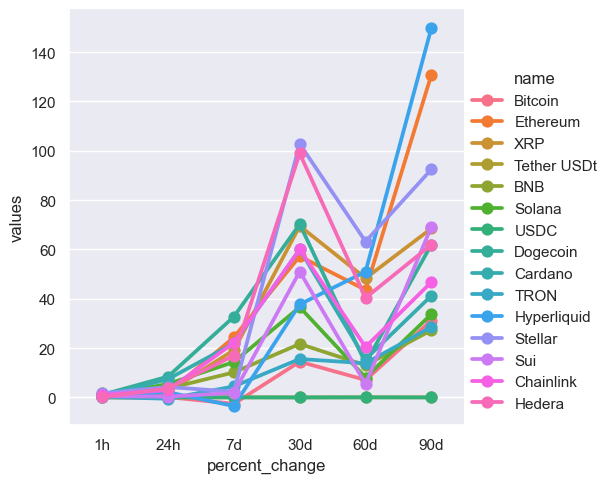

In [150]:
#plot for showing the changes of different cryptos over the course of different time frames
sns.catplot(x = 'percent_change', y = 'values', hue = 'name', data = df7, kind = 'point')

In [151]:
df10 = df[['name', 'quote.USD.price', 'timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,118574.27039,2025-07-21 19:42:59.941924
15,Bitcoin,118567.09246,2025-07-21 19:44:54.068356
30,Bitcoin,118643.43151,2025-07-21 19:45:54.861002


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

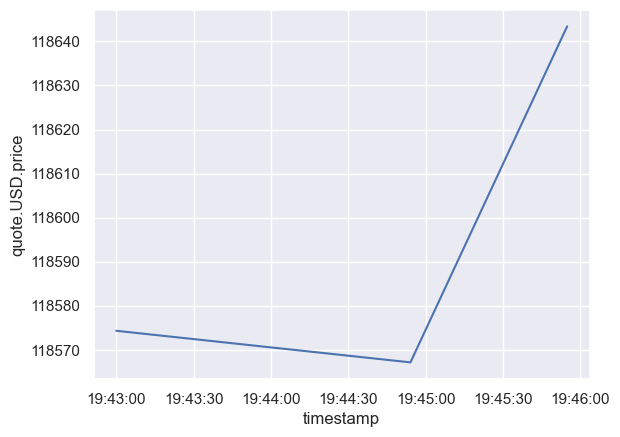

In [152]:
#plot for showing the changes in the Bitcoin crypto during a span of a 5 minutes
sns.set_theme(style = "darkgrid")
sns.lineplot(x = 'timestamp', y = 'quote.USD.price', data = df10)